# fundamentals of machine learning

##### what is machine learning
Field of study that gives computers the ability to learn without being explicitly programmed.

##### Types of Machine Learning Systems
1. Supervised Learning:

Definition: Training data includes labels.
Tasks: Classification and Regression.
Examples: Spam classification, predicting car prices.
Algorithms: k-Nearest Neighbors, Linear Regression, Logistic Regression, SVMs, Decision Trees, Random Forests, Neural Networks.

2. Unsupervised Learning:


Definition: Training data is unlabeled.
Tasks: Clustering, Anomaly detection, Visualization, Dimensionality reduction, Association rule learning.
Algorithms: K-Means, DBSCAN, HCA, PCA, Kernel PCA, LLE, t-SNE, Apriori, Eclat.
Example: Clustering blog visitors to identify patterns in behavior.


3. Semisupervised Learning:

Definition: Training data includes both labeled and unlabeled data.
Example: Google Photos clustering people in photos and learning names from a few labels.
Algorithms: Combination of unsupervised and supervised learning methods like DBNs with RBMs.


4. Reinforcement Learning:


Definition: Learning system (agent) learns by interacting with the environment and receiving rewards or penalties.
Example: Robots learning to walk, DeepMind’s AlphaGo.
Goal: Learn the best strategy (policy) to maximize rewards over time.

In [23]:
# Example 1-1. Training and running a linear model using Scikit-Learn 

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [24]:
import pandas as pd

def prepare_country_stats(oecd_bli, gdp_per_capita):
    # Prepare the OECD data
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    oecd_bli["life satisfaction"] = oecd_bli["life satisfaction"]
    
    # Prepare the GDP data
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    # Merge the datasets
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    return full_country_stats[["GDP per capita", "life satisfaction"]].dropna()


In [25]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
 encoding='latin1', na_values="n/a")

oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [26]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [29]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

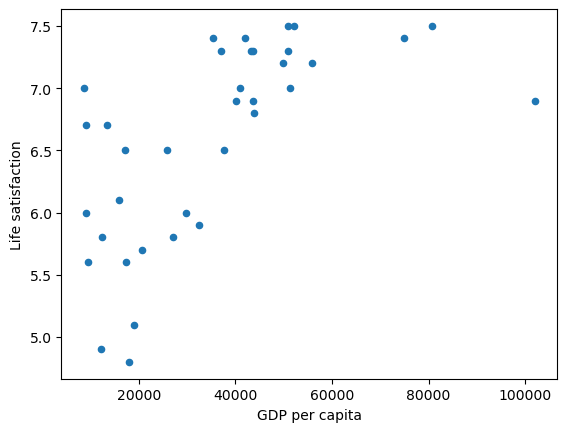

In [30]:
#  Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


In [31]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.28653637]]


In [34]:
# replacing the existing model with 

import sklearn.neighbors
model_k = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [37]:
model_k.fit(X,y)
X_new=model_k.predict([[22587]])
X_new


array([[5.76666667]])

### Exercises

1. **How would you define Machine Learning?**
   - Machine Learning is a field of study that gives computers the ability to learn from data without being explicitly programmed.

2. **Can you name four types of problems where it shines?**
   - Image recognition
   - Speech recognition
   - Predictive analytics
   - Natural language processing

3. **What is a labeled training set?**
   - A dataset that includes input-output pairs where the desired output (label) is provided for each input.

4. **What are the two most common supervised tasks?**
   - Classification
   - Regression

5. **Can you name four common unsupervised tasks?**
   - Clustering
   - Dimensionality reduction
   - Anomaly detection
   - Association rule learning

6. **What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?**
   - Reinforcement learning

7. **What type of algorithm would you use to segment your customers into multiple groups?**
   - Clustering algorithm

8. **Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?**
   - Supervised learning problem

9. **What is an online learning system?**
   - A system that learns incrementally by processing data instances sequentially.

10. **What is out-of-core learning?**
    - A method for learning from data that cannot fit into memory by using data in chunks.

11. **What type of learning algorithm relies on a similarity measure to make predictions?**
    - Instance-based learning algorithm

12. **What is the difference between a model parameter and a learning algorithm’s hyperparameter?**
    - Model parameter: Learned from training data (e.g., weights in a neural network).
    - Hyperparameter: Set before training and used to control the learning process (e.g., learning rate).

13. **What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?**
    - Search for the best model parameters.
    - Common strategy: Minimize a cost function.
    - Make predictions by applying the learned model to new data.

14. **Can you name four of the main challenges in Machine Learning?**
    - Insufficient training data
    - Poor data quality
    - Non-representative data
    - Overfitting and underfitting

15. **If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?**
    - Overfitting
    - Solutions: Cross-validation, regularization, getting more training data

16. **What is a test set and why would you want to use it?**
    - A set of data used to evaluate the final model's performance to ensure it generalizes well to new data.

17. **What is the purpose of a validation set?**
    - To tune hyperparameters and select the best model.

18. **What can go wrong if you tune hyperparameters using the test set?**
    - The model may overfit to the test set and not generalize well to new data.

19. **What is repeated cross-validation and why would you prefer it to using a single validation set?**
    - Repeatedly splitting the data into different training and validation sets to ensure robust evaluation.
    - Preferred to reduce variance in performance estimates and better utilize the data.